In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from mlscorecheck.auc import (
    auc_onmin_grad,
    auc_rmin_grad,
    auc_max_grad,
    auc_maxa_grad,
    macc_min_grad,
    acc_rmax_grad
)

/home/gykovacs/workspaces/mlscorecheck/mlscorecheck/auc/_acc_single.py:200: RuntimeWarning: divide by zero encountered in scalar divide
  return n * p / ((n + p) * np.sqrt(-2 * auc * n * p + 2 * n * p))


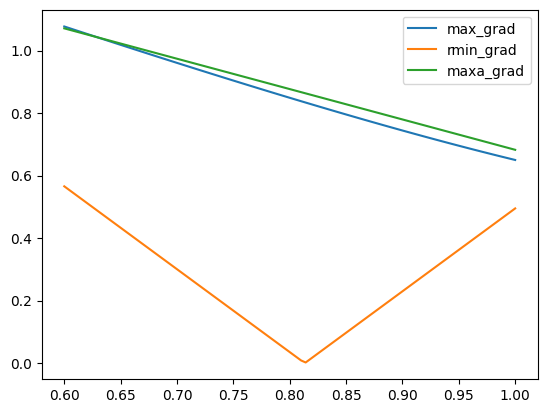

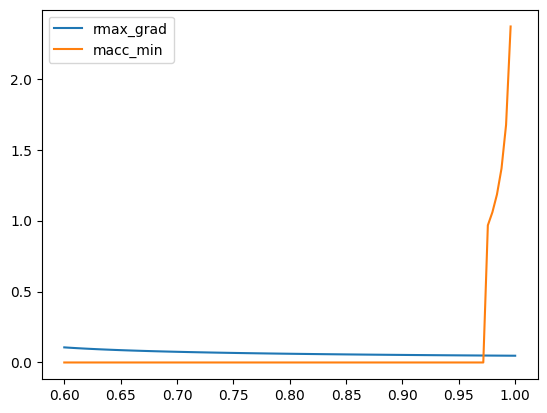

In [31]:
fprs = np.linspace(0.65, 1.0, 100)[::-1]
tprs = np.linspace(0.6, 1.0, 100)

p=10
n=200

auc_max_grad_ = np.array([auc_max_grad(fpr, tpr) for fpr, tpr in zip(fprs, tprs)])
auc_rmin_grad_ = np.array([auc_rmin_grad(fpr, tpr) for fpr, tpr in zip(fprs, tprs)])
auc_maxa_grad_ = np.array([auc_maxa_grad((p*tpr + n*(1 - fpr))/(p + n), p, n) for fpr, tpr in zip(fprs, tprs)])/(n/p)

acc_rmax_grad_ = np.array([acc_rmax_grad(auc_, p, n) for auc_ in tprs])
macc_min_grad_ = np.array([macc_min_grad(auc_, p, n) for auc_ in tprs])

plt.plot(tprs, auc_max_grad_, label='max_grad')
plt.plot(tprs, auc_rmin_grad_, label='rmin_grad')
plt.plot(tprs, auc_maxa_grad_, label='maxa_grad')
plt.legend()

plt.figure()

plt.plot(tprs, acc_rmax_grad_, label='rmax_grad')
plt.plot(tprs, macc_min_grad_, label='macc_min')
plt.legend()

In [32]:
#label = 'aggregated-ns'
#clabel = 'avg.'

#label = 'aggregated'
#clabel = 'avg.'

label = 'single'
clabel = ''

In [33]:
results = []

In [34]:
data = pd.read_csv(f'processed-{label}.csv')

In [35]:
data = pd.concat([
    data[(data['auc'] >= 0.5) & (data['auc'] <= 0.55)].sample(200, random_state=5, replace=True),
    data[(data['auc'] > 0.55) & (data['auc'] <= 0.6)].sample(200, random_state=5),
    data[(data['auc'] > 0.6) & (data['auc'] <= 0.65)].sample(200, random_state=5),
    data[(data['auc'] > 0.65) & (data['auc'] <= 0.7)].sample(200, random_state=5),
    data[(data['auc'] > 0.7) & (data['auc'] <= 0.75)].sample(200, random_state=5),
    data[(data['auc'] > 0.75) & (data['auc'] <= 0.8)].sample(200, random_state=5),
    data[(data['auc'] > 0.8) & (data['auc'] <= 0.85)].sample(200, random_state=5),
    data[(data['auc'] > 0.85) & (data['auc'] <= 0.9)].sample(200, random_state=5),
    data[(data['auc'] > 0.9) & (data['auc'] <= 0.95)].sample(200, random_state=5),
    data[(data['auc'] > 0.95) & (data['auc'] <= 1.0)].sample(200, random_state=5),
    ])

#data = data[data['auc'] > 0.75]

In [36]:
data.columns

Index(['dataset', 'classifier', 'acc', 'sens', 'spec', 'auc', 'best_acc',
       'best_sens', 'best_spec', 'threshold', 'best_threshold', 'p', 'n',
       'auc_min', 'auc_min_best', 'auc_rmin', 'auc_rmin_best', 'auc_grmin',
       'auc_grmin_best', 'auc_amin', 'auc_amin_best', 'auc_armin',
       'auc_armin_best', 'auc_onmin', 'auc_onmin_best', 'auc_max',
       'auc_max_best', 'auc_amax', 'auc_amax_best', 'auc_maxa',
       'auc_maxa_best', 'acc_min', 'acc_rmin', 'acc_max', 'acc_rmax',
       'max_acc_min', 'max_acc_max', 'max_acc_rmax', 'max_acc_onmax'],
      dtype='object')

In [37]:
def convert(x):
    try:
        return float(x)
    except:
        return None

In [38]:
data['auc_min_max'] = (data['auc_min'].apply(convert) + data['auc_max'].apply(convert)) / 2.0
data['auc_rmin_max'] = (data['auc_rmin'].apply(convert) + data['auc_max'].apply(convert)) / 2.0
data['auc_onmin_max'] = (data['auc_onmin'].apply(convert) + data['auc_max'].apply(convert)) / 2.0
data['auc_rmin_maxa'] = (data['auc_rmin'].apply(convert) + data['auc_maxa'].apply(convert)) / 2.0

data['auc_min_max_best'] = ((data['auc_min_best'].apply(convert)) + data['auc_max_best'].apply(convert)) / 2.0
data['auc_rmin_max_best'] = ((data['auc_rmin_best'].apply(convert)) + data['auc_max_best'].apply(convert)) / 2.0

data['auc_min_maxa_best'] = ((data['auc_min_best'].apply(convert)) + data['auc_maxa_best'].apply(convert)) / 2.0
data['auc_rmin_maxa_best'] = ((data['auc_rmin_best'].apply(convert)) + data['auc_maxa_best'].apply(convert)) / 2.0
data['auc_onmin_maxa_best'] = ((data['auc_onmin_best'].apply(convert)) + data['auc_maxa_best'].apply(convert)) / 2.0

data['max_acc_min_max'] = (data['max_acc_min'].apply(convert) + data['max_acc_max'].apply(convert)) / 2.0
data['max_acc_min_rmax'] = (data['max_acc_min'].apply(convert) + data['max_acc_rmax'].apply(convert)) / 2.0
data['max_acc_min_onmax'] = (data['max_acc_min'].apply(convert) + data['max_acc_onmax'].apply(convert)) / 2.0



In [39]:
exponent = 1

data['auc_rmin_best_grad'] = data.apply(lambda row: auc_rmin_grad(1 - row['best_spec'], row['best_sens']), axis=1) + 1
#data['auc_maxa_best_grad'] = data.apply(lambda row: auc_maxa_grad(row['best_acc'], row['p'], row['n']), axis=1) / (data['n']/data['p']) + 1
data['auc_maxa_best_grad'] = data.apply(lambda row: auc_maxa_grad(row['best_acc'], row['p'], row['n']), axis=1) + 1
data['auc_rmin_maxa_best'] = (data['auc_rmin_best'].apply(convert) * data['auc_maxa_best_grad']**exponent + data['auc_maxa_best'].apply(convert) * data['auc_rmin_best_grad']**exponent)/(data['auc_rmin_best_grad']**exponent + data['auc_maxa_best_grad']**exponent)

data['auc_rmin_grad'] = data.apply(lambda row: auc_rmin_grad(1 - row['spec'], row['sens']), axis=1)
data['auc_max_grad'] = data.apply(lambda row: auc_max_grad(1 - row['spec'], row['sens']), axis=1)
data['auc_rmin_max'] = (data['auc_rmin_best'].apply(convert) * data['auc_max_grad'] + data['auc_max'].apply(convert) * data['auc_rmin_grad'])/(data['auc_rmin_grad'] + data['auc_max_grad'])

data['max_acc_min_grad'] = data.apply(lambda row: macc_min_grad(row['auc'], row['p'], row['n']), axis=1) + 1
data['max_acc_rmax_grad'] = data.apply(lambda row: acc_rmax_grad(row['auc'], row['p'], row['n']), axis=1) + 1
data['max_acc_min_rmax'] = (data['max_acc_min'].apply(convert) * data['max_acc_rmax_grad'] + data['max_acc_rmax'].apply(convert) * data['max_acc_min_grad'])/(data['max_acc_min_grad'] + data['max_acc_rmax_grad'])

/home/gykovacs/workspaces/mlscorecheck/mlscorecheck/auc/_acc_single.py:200: RuntimeWarning: divide by zero encountered in scalar divide
  return n * p / ((n + p) * np.sqrt(-2 * auc * n * p + 2 * n * p))
/home/gykovacs/workspaces/mlscorecheck/mlscorecheck/auc/_acc_single.py:129: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(2) * min(p, n) / 2 / (np.sqrt(auc - 0.5) * (p + n))


In [40]:
for col in data.columns[2:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

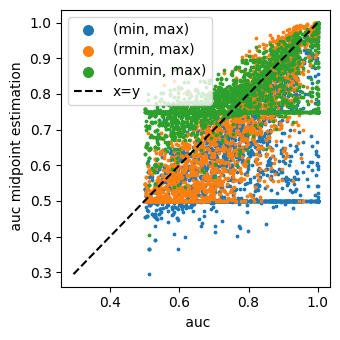

In [41]:
plt.figure(figsize=(3.5, 3.5))
val_min = min(min(data['auc']), min(data['auc_min_max']), min(data['auc_rmin_max']))
plt.scatter(data['auc'], data['auc_min_max'], label='(min, max)', s=3)
plt.scatter(data['auc'], data['auc_rmin_max'], label='(rmin, max)', s=3)
plt.scatter(data['auc'], data['auc_onmin_max'], label='(onmin, max)', s=3)
plt.xlabel(f'{clabel} auc')
plt.ylabel(f'{clabel} auc midpoint estimation')
plt.plot([val_min, 1], [val_min, 1], label='x=y', c='black', linestyle='--')
plt.legend(markerscale=4)
plt.tight_layout()
plt.savefig(f'figures-midpoints/{label}-auc-midpoint.pdf')

In [42]:
tmp = data[['auc', 'auc_rmin_max']].dropna()
tmp1 = data[['auc', 'auc_onmin_max']].dropna()
(r2_score(data['auc'], data['auc_min_max']),
r2_score(tmp['auc'], tmp['auc_rmin_max']),
r2_score(tmp1['auc'], tmp1['auc_onmin_max']))

(-0.7530749351474522, 0.5844902956684934, 0.33683309247736226)

In [43]:
(mean_absolute_percentage_error(data['auc'], data['auc_min_max']),
mean_absolute_percentage_error(tmp['auc'], tmp['auc_rmin_max']))

(np.float64(0.1774165296058492), np.float64(0.09259201060877212))

In [44]:
data

,dataset,classifier,acc,sens,spec,auc,best_acc,best_sens,best_spec,threshold,...,auc_onmin_maxa_best,max_acc_min_max,max_acc_min_rmax,max_acc_min_onmax,auc_rmin_best_grad,auc_maxa_best_grad,auc_rmin_grad,auc_max_grad,max_acc_min_grad,max_acc_rmax_grad
5971,appendicitis,"{'max_depth': 9, 'random_state': 5}",0.181818,1.000000,0.000000,0.541667,0.818182,0.000000,1.000000,0.000000,...,0.694506,0.867433,0.838164,0.825776,1.000000,2.222222,0.000000,1.000000,1.000000,1.629837
7125,hepatitis,{'n_neighbors': 6},0.516129,0.333333,0.590909,0.540404,0.741935,0.111111,1.000000,0.333333,...,0.697007,0.788138,0.737027,0.721437,1.157135,2.252525,0.107137,0.782176,1.000000,2.021300
8716,PC1,{'n_neighbors': 4},0.896396,0.250000,0.946602,0.544296,0.936937,0.187500,0.995146,0.500000,...,0.780842,0.947546,0.937506,0.931128,1.258300,1.942961,0.278037,0.751898,1.000000,1.242141
4332,CM1,"{'max_depth': 7, 'random_state': 5}",0.100000,1.000000,0.000000,0.516667,0.900000,0.000000,1.000000,0.000000,...,0.722278,0.925838,0.907188,0.901677,1.000000,2.111111,0.000000,1.000000,1.000000,1.547723
637,CM1,{'n_neighbors': 9},0.490000,0.500000,0.488889,0.513889,0.900000,0.000000,1.000000,0.111111,...,0.722278,0.925699,0.906433,0.901399,1.000000,2.111111,0.015713,0.715007,1.000000,1.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,shuttle-c0-vs-c4,{'n_neighbors': 3},0.928962,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,inf,...,0.999975,0.998184,NaN,0.998184,2.414214,1.000000,0.000000,1.000000,inf,1.071038
4503,monk-2,{'n_neighbors': 5},0.632184,0.200000,1.000000,0.997872,0.977011,0.950000,1.000000,1.000000,...,0.986948,0.982901,0.994391,0.982435,2.343503,1.092553,0.282843,0.800000,8.640004,1.460751
1917,monk-2,{'n_neighbors': 6},1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,...,0.999975,0.996465,NaN,0.996465,2.414214,1.000000,1.414214,0.000000,inf,1.494253
1610,dermatology-6,"{'max_depth': 3, 'random_state': 5}",0.069444,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000076,...,0.999975,0.998202,NaN,0.998202,2.414214,1.000000,0.000000,1.000000,inf,1.069444


In [45]:
"""tmp = data.dropna()
wilcoxon(np.abs(tmp['auc'] - tmp['auc_min_max']), 
         np.abs(tmp['auc'] - tmp['auc_rmin_max']))"""

"tmp = data.dropna()\nwilcoxon(np.abs(tmp['auc'] - tmp['auc_min_max']), \n         np.abs(tmp['auc'] - tmp['auc_rmin_max']))"

In [46]:
results.append({'target': ['auc', 'auc'],
                'source': ['arbitrary sens, spec', 'arbitrary sens, spec'],
                'estimation': ['(min, max)', '(rmin, max)'],
                'r2': [r2_score(data['auc'], data['auc_min_max']),
                       r2_score(tmp['auc'], tmp['auc_rmin_max'])],
                'mape': [mean_absolute_percentage_error(data['auc'], data['auc_min_max']),
                         mean_absolute_percentage_error(tmp['auc'], tmp['auc_rmin_max'])]})

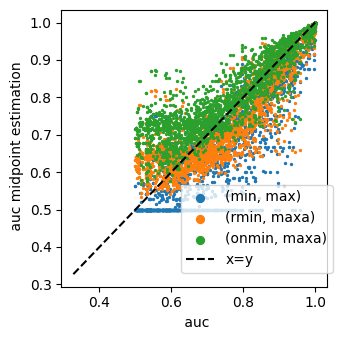

In [47]:
plt.figure(figsize=(3.5, 3.5))
val_min = min(min(data['auc']), 
              min(data['auc_min_max_best']),
              min(data['auc_rmin_max_best']),
              min(data['auc_min_maxa_best']),
              min(data['auc_rmin_maxa_best']),
              min(data['auc_onmin_maxa_best'])
              )
plt.scatter(data['auc'], data['auc_min_max_best'], label='(min, max)', s=2)
#plt.scatter(data['auc'], data['auc_rmin_max_best'], label='(rmin, max)', s=2)
#plt.scatter(data['auc'], data['auc_min_maxa_best'], label='(min, maxa)', s=2)
plt.scatter(data['auc'], data['auc_rmin_maxa_best'], label='(rmin, maxa)', s=2)
plt.scatter(data['auc'], data['auc_onmin_maxa_best'], label='(onmin, maxa)', s=2)
plt.xlabel(f'{clabel} auc')
plt.ylabel(f'{clabel} auc midpoint estimation')
plt.plot([val_min, 1], [val_min, 1], label='x=y', c='black', linestyle='--')
plt.legend(markerscale=4, loc=(0.45, 0.05))
plt.tight_layout()
plt.savefig(f'figures-midpoints/{label}-auc-macc-midpoint.pdf')

In [48]:
tmp = data[['auc', 'auc_min_max_best', 'auc_rmin_max_best', 'auc_min_maxa_best', 'auc_rmin_maxa_best', 'auc_onmin_maxa_best']].dropna()

tmp0 = data[['auc', 'auc_rmin_max_best']].dropna()
tmp1 = data[['auc', 'auc_min_maxa_best']].dropna()
tmp2 = data[['auc', 'auc_rmin_maxa_best']].dropna()
tmp3 = data[['auc', 'auc_onmin_maxa_best']].dropna()
(r2_score(tmp['auc'], tmp['auc_min_max_best']),
r2_score(tmp['auc'], tmp['auc_rmin_max_best']),
#r2_score(tmp['auc'], tmp['auc_min_maxa_best']),
r2_score(tmp['auc'], tmp['auc_rmin_maxa_best']),
r2_score(tmp['auc'], tmp['auc_onmin_maxa_best']))

(0.5586380434671543,
 0.4816559984436065,
 0.7549865130874414,
 0.6313009781743928)

In [49]:
(mean_absolute_percentage_error(tmp['auc'], tmp['auc_min_max_best']),
mean_absolute_percentage_error(tmp['auc'], tmp['auc_rmin_max_best']),
mean_absolute_percentage_error(tmp['auc'], tmp['auc_min_maxa_best']),
mean_absolute_percentage_error(tmp['auc'], tmp['auc_rmin_maxa_best']))

(np.float64(0.0937370540267925),
 np.float64(0.12343139460112786),
 np.float64(0.14020260317985894),
 np.float64(0.07966783846282885))

In [50]:
tmp = data.dropna()
wilcoxon(np.abs(tmp['auc'] - tmp['auc_min_max_best']), 
         np.abs(tmp['auc'] - tmp['auc_rmin_maxa_best']))

WilcoxonResult(statistic=np.float64(394513.5), pvalue=np.float64(1.7145958148258168e-26))

In [51]:
results.append({'target': ['auc', 'auc', 'auc', 'auc'],
                'source': ['sens, spec at max. acc', 'sens, spec at max. acc', 'sens, spec at max. acc', 'sens, spec at max. acc'],
                'estimation': ['(min, max)', '(rmin, max)', '(min, maxa)', '(rmin, maxa)'],
                'r2': (r2_score(data['auc'], data['auc_min_max_best']),
r2_score(tmp0['auc'], tmp0['auc_rmin_max_best']),
r2_score(tmp1['auc'], tmp1['auc_min_maxa_best']),
r2_score(tmp2['auc'], tmp2['auc_rmin_maxa_best'])),
                'mape': (mean_absolute_percentage_error(data['auc'], data['auc_min_max_best']),
mean_absolute_percentage_error(tmp0['auc'], tmp0['auc_rmin_max_best']),
mean_absolute_percentage_error(tmp1['auc'], tmp1['auc_min_maxa_best']),
mean_absolute_percentage_error(tmp2['auc'], tmp2['auc_rmin_maxa_best']))})

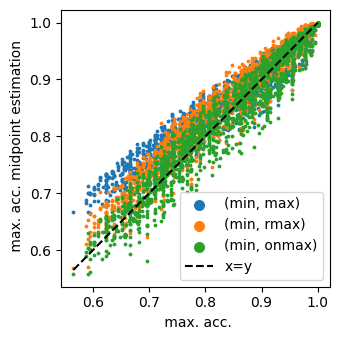

In [52]:
plt.figure(figsize=(3.5, 3.5))
val_min = min(min(data['best_acc']), 
              min(data['max_acc_min_max']),
              min(data['max_acc_min_rmax']))
plt.scatter(data['best_acc'], data['max_acc_min_max'], label='(min, max)', s=3)
plt.scatter(data['best_acc'], data['max_acc_min_rmax'], label='(min, rmax)', s=3)
plt.scatter(data['best_acc'], data['max_acc_min_onmax'], label='(min, onmax)', s=3)
plt.xlabel(f'{clabel} max. acc.')
plt.ylabel(f'{clabel} max. acc. midpoint estimation')
plt.plot([val_min, 1], [val_min, 1], label='x=y', c='black', linestyle='--')
plt.legend(markerscale=4)
plt.tight_layout()
plt.savefig(f'figures-midpoints/{label}-max-acc-midpoint.pdf')

In [53]:
tmp0 = data[['best_acc', 'max_acc_min_max']].dropna()
tmp1 = data[['best_acc', 'max_acc_min_rmax']].dropna()
(r2_score(tmp0['best_acc'], tmp0['max_acc_min_max']),
r2_score(tmp1['best_acc'], tmp1['max_acc_min_rmax']))

(0.8110504812547714, 0.8906824191553651)

In [54]:
(mean_absolute_percentage_error(tmp0['best_acc'], tmp0['max_acc_min_max']),
mean_absolute_percentage_error(tmp1['best_acc'], tmp1['max_acc_min_rmax']))

(np.float64(0.04864217372593979), np.float64(0.0354232068090639))

In [55]:
tmp = data.dropna()
wilcoxon(np.abs(tmp['best_acc'] - tmp['max_acc_min_max']), 
         np.abs(tmp['best_acc'] - tmp['max_acc_min_rmax']))

WilcoxonResult(statistic=np.float64(279533.0), pvalue=np.float64(1.1144610549059579e-67))

In [56]:
results.append({'target': ['max. acc', 'max. acc'],
                'source': ['auc', 'auc'],
                'estimation': ['(min, max)', '(min, rmax)'],
                'r2': (r2_score(tmp0['best_acc'], tmp0['max_acc_min_max']),
r2_score(tmp1['best_acc'], tmp1['max_acc_min_rmax'])),
                'mape': (mean_absolute_percentage_error(tmp0['best_acc'], tmp0['max_acc_min_max']),
mean_absolute_percentage_error(tmp1['best_acc'], tmp1['max_acc_min_rmax']))})

In [57]:
results = pd.concat([pd.DataFrame(results[0]), pd.DataFrame(results[1]), pd.DataFrame(results[2])])

In [58]:
results.to_csv(f'results-midpoints-{label}.csv', index=False)